## 0.0 Imports

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import datetime as dt
import re 

from plotly              import express as px
from sklearn             import cluster as c 
from sklearn             import metrics as m 
from matplotlib          import pyplot  as plt

### 0.1 Helper Functions

### 0.2 Load Dataset

In [2]:
# load data
df_raw = pd.read_csv('data/kawa_teste.csv')
df_raw.head(5)

,Número do pedido,Nome do produto,Preço,Quantidade,Nome do Cupom,Valor do Cupom,Nome do cliente,Email,Celular,Estado,Região,Custo real do frete,Data da realização do pedido,Data de adição do último histórico,Nome do outfit
0,19950,1kg - Caramelo,"R$98,00",1,Não há cupom,Não há cupom,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551,Rio de Janeiro,Região Sudeste,"R$16,30",01/01/2023,12/01/2023,Kit 2Kg Kawá Caramelo - O campeão de vendas
1,19950,1kg - Caramelo Kit,"R$98,00",1,Não há cupom,Não há cupom,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551,Rio de Janeiro,Região Sudeste,"R$16,30",01/01/2023,12/01/2023,Kit 2Kg Kawá Caramelo - O campeão de vendas
2,19951,Caramelo - 250g,"R$43,00",1,Não há cupom,Não há cupom,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088,Rio Grande do Sul,Região Sul,"R$19,29",01/01/2023,11/01/2023,Kit Quero - 3 Pacotes de 250g
3,19951,Frutas Tropicais - 250g,"R$43,00",1,Não há cupom,Não há cupom,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088,Rio Grande do Sul,Região Sul,"R$19,29",01/01/2023,11/01/2023,Kit Quero - 3 Pacotes de 250g
4,19951,Favo de Mel - 250g,"R$43,00",1,Não há cupom,Não há cupom,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088,Rio Grande do Sul,Região Sul,"R$19,29",01/01/2023,11/01/2023,Kit Quero - 3 Pacotes de 250g


## 1.0 Descrição dos Dados

In [3]:
df1 = df_raw.copy()

### 1.1 Rename Columns

In [4]:
df1.columns


Index(['Número do pedido', 'Nome do produto', 'Preço', 'Quantidade',
       'Nome do Cupom', 'Valor do Cupom', 'Nome do cliente', 'Email',
       'Celular', 'Estado', 'Região', 'Custo real do frete',
       'Data da realização do pedido', 'Data de adição do último histórico',
       'Nome do outfit'],
      dtype='object')

In [5]:
cols_new = ['invoice_no', 'product_name', 'price', 'quantity', 'coupon_name', 
            'coupon_discount', 'customer_name', 'email', 'phone', 'state', 'region',
            'shipping_cost', 'order_date', 'order_delivery', 'kit']
df1.columns = cols_new

### 1.2 Data dimension

In [6]:
print( 'Number of rows: {}'.format( df1.shape[0]))
print( 'Number of cols: {}'.format( df1.shape[1]))

Number of rows: 16777
Number of cols: 15


In [7]:
df1.duplicated().sum()

41

In [8]:
duplicated_rows = df1[df1.duplicated()]
duplicated_rows.head(50)

,invoice_no,product_name,price,quantity,coupon_name,coupon_discount,customer_name,email,phone,state,region,shipping_cost,order_date,order_delivery,kit
625,20209,Mogiana - 250g,"R$39,00",1,Cupom (parceria20tao),"-R$20,00",Gabriel Altieri,gabrielfeb@gmail.com,(11)99521-2985,Sao Paulo,Região Sudeste,"R$12,61",18/01/2023,20/01/2023,Kit Microlotes - Experiência Sensorial
627,20209,Rapadura - 250g,"R$39,00",1,Cupom (parceria20tao),"-R$20,00",Gabriel Altieri,gabrielfeb@gmail.com,(11)99521-2985,Sao Paulo,Região Sudeste,"R$12,61",18/01/2023,20/01/2023,Kit Microlotes - Experiência Sensorial
629,20209,Especiarias - 250g,"R$39,00",1,Cupom (parceria20tao),"-R$20,00",Gabriel Altieri,gabrielfeb@gmail.com,(11)99521-2985,Sao Paulo,Região Sudeste,"R$12,61",18/01/2023,20/01/2023,Kit Microlotes - Experiência Sensorial
631,20209,Salada de Frutas - 250g,"R$39,00",1,Cupom (parceria20tao),"-R$20,00",Gabriel Altieri,gabrielfeb@gmail.com,(11)99521-2985,Sao Paulo,Região Sudeste,"R$12,61",18/01/2023,20/01/2023,Kit Microlotes - Experiência Sensorial
1338,20541,1kg - Caramelo,"R$112,00",1,Não há cupom,Não há cupom,LEANDRO JOSÉ MARTINEZ,lemartin@aasp.org.br,(19)99684-4404,Sao Paulo,Região Sudeste,"R$16,36",06/02/2023,14/02/2023,NaN
1532,20660,1kg - Caramelo,"R$112,00",1,Cupom 15% (JCAFE15),"-R$33,60",Antonio Dias Lima Neto,netodiaslima@gmail.com,(12)98129-0322,Sao Paulo,Região Sudeste,"R$16,36",10/02/2023,16/02/2023,NaN
1853,20821,Caramelo - 250g,"R$52,00",1,Cupom 15% (JCAFE15),"-R$31,20",Diniz Bortolotto,diniz.bortolotto@gmail.com,(61)98146-6471,Distrito Federal,Região Centro-Oeste,"R$19,11",18/02/2023,04/03/2023,NaN
1855,20821,Frutas Vermelhas - 250g,"R$52,00",1,Cupom 15% (JCAFE15),"-R$31,20",Diniz Bortolotto,diniz.bortolotto@gmail.com,(61)98146-6471,Distrito Federal,Região Centro-Oeste,"R$19,11",18/02/2023,04/03/2023,NaN
2216,21003,Rapadura - 250g,"R$52,00",1,Não há cupom,Não há cupom,Edilson Caetano Rebouças,reboucascaetano@yahoo.com.br,(84)99617-0019,Rio Grande do Norte,Região Nordeste,"R$25,87",25/02/2023,27/02/2023,NaN
2625,21219,Rapadura - 250g,"R$52,00",1,Não há cupom,Não há cupom,Roberto Guimarães Morati Junior,robertomorati@gmail.com,(27)99806-4939,Espirito Santo,Região Sudeste,"R$17,85",04/03/2023,11/03/2023,NaN


### 1.3 Data types

In [9]:
df1.dtypes

invoice_no          int64
product_name       object
price              object
quantity            int64
coupon_name        object
coupon_discount    object
customer_name      object
email              object
phone              object
state              object
region             object
shipping_cost      object
order_date         object
order_delivery     object
kit                object
dtype: object

### 1.4 Check NA

In [10]:
df1.isna().sum()

invoice_no            0
product_name          0
price                 0
quantity              0
coupon_name           0
coupon_discount       0
customer_name         0
email                 0
phone                 0
state                 0
region                0
shipping_cost         0
order_date            0
order_delivery        0
kit                7223
dtype: int64

### 1.5 Replace NA

In [11]:
# definir como substituir NA na coluna kit para cluster

### 1.6 Change dtypes

In [12]:
# order date, order delivery
df1['order_date'] = pd.to_datetime( df1['order_date'], format='%d/%m/%Y')
df1['order_delivery'] = pd.to_datetime( df1['order_delivery'], format='%d/%m/%Y')

# price
df1['price'] = df1['price'].str.replace('[^\d,]', '', regex=True)
df1['price'] = df1['price'].str.replace(',', '.', regex=True).astype(float)

# coupon discount
df1['coupon_discount'] = df1['coupon_discount'].replace('Não há cupom', '0')
# df1['coupon_discount'] = df1['coupon_discount'].str.replace('-', '', regex=True)
df1['coupon_discount'] = df1['coupon_discount'].str.replace('[^\d,-]', '', regex=True)
df1['coupon_discount'] = df1['coupon_discount'].apply(lambda x: float(re.sub(r',', '.', x)) if x else 0)
df1['coupon_discount'] = df1['coupon_discount'].abs()


# shipping cost
df1['shipping_cost'] = df1['shipping_cost'].str.replace('[^\d,]', '', regex=True)
df1['shipping_cost'] = df1['shipping_cost'].str.replace(',', '.', regex=True).astype(float)

df1.head()

,invoice_no,product_name,price,quantity,coupon_name,coupon_discount,customer_name,email,phone,state,region,shipping_cost,order_date,order_delivery,kit
0,19950,1kg - Caramelo,98.0,1,Não há cupom,0.0,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551,Rio de Janeiro,Região Sudeste,16.30,2023-01-01,2023-01-12,Kit 2Kg Kawá Caramelo - O campeão de vendas
1,19950,1kg - Caramelo Kit,98.0,1,Não há cupom,0.0,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551,Rio de Janeiro,Região Sudeste,16.30,2023-01-01,2023-01-12,Kit 2Kg Kawá Caramelo - O campeão de vendas
2,19951,Caramelo - 250g,43.0,1,Não há cupom,0.0,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088,Rio Grande do Sul,Região Sul,19.29,2023-01-01,2023-01-11,Kit Quero - 3 Pacotes de 250g
3,19951,Frutas Tropicais - 250g,43.0,1,Não há cupom,0.0,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088,Rio Grande do Sul,Região Sul,19.29,2023-01-01,2023-01-11,Kit Quero - 3 Pacotes de 250g
4,19951,Favo de Mel - 250g,43.0,1,Não há cupom,0.0,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088,Rio Grande do Sul,Região Sul,19.29,2023-01-01,2023-01-11,Kit Quero - 3 Pacotes de 250g


In [83]:
# Calcular o número de invoice_no únicos para cada região
unique_invoices_by_region = df1.groupby('region')['invoice_no'].nunique().reset_index()
unique_invoices_by_region = unique_invoices_by_region.rename(columns={'invoice_no': 'unique_invoice_count_region'})

# Calcular o número de invoice_no únicos para cada estado
unique_invoices_by_state = df1.groupby('state')['invoice_no'].nunique().reset_index()
unique_invoices_by_state = unique_invoices_by_state.rename(columns={'invoice_no': 'unique_invoice_count_state'})

# Exportar os resultados para um arquivo CSV
unique_invoices_by_region.to_csv('unique_invoices_by_region.csv', index=False)
unique_invoices_by_state.to_csv('unique_invoices_by_state.csv', index=False)


In [85]:
unique_invoices_by_region

,region,unique_invoice_count_region
0,Região Centro-Oeste,957
1,Região Nordeste,794
2,Região Norte,200
3,Região Sudeste,4210
4,Região Sul,1781


In [86]:
unique_invoices_by_state = unique_invoices_by_state[unique_invoices_by_state['state'].str.isalpha()]

unique_invoices_by_state.reset_index(drop=True, inplace=True)

unique_invoices_by_state.to_csv('estados.csv', index=False)

In [13]:
df1.sample(5)

,invoice_no,product_name,price,quantity,coupon_name,coupon_discount,customer_name,email,phone,state,region,shipping_cost,order_date,order_delivery,kit
75,19978,Frutas Vermelhas - 250g,52.00,1,Cupom 20% (PARCERIA20TAO),31.2,Bruno Fuzetti Penso,viperp@gmail.com,(41)99184-0638,Parana,Região Sul,14.97,2023-01-03,2023-01-09,NaN
15247,27746,Licor de Jabuticaba - 250g,44.75,1,Não há cupom,0.0,TIAGO DUMMER VAZ,tiagodvaz@gmail.com,(61)99144-4781,Distrito Federal,Região Centro-Oeste,16.52,2023-08-24,2023-08-30,Kit Frutado - 4 Pacotes de 250g
2219,21004,1kg - Caramelo Kit,98.00,1,Não há cupom,0.0,Breno Augusto Siqueira Besteti,breno.s.besteti@gmail.com,(17)99778-4573,Sao Paulo,Região Sudeste,18.81,2023-02-25,2023-03-04,Kit 2Kg Kawá Caramelo - O campeão de vendas
15135,27685,1kg - Caramelo,109.50,1,Cupom 10% (JC10),21.9,Rafael Fix,fix@rafaelfix.com.br,(41)99838-8365,Parana,Região Sul,20.76,2023-08-23,2023-08-29,Kit 2Kg Kawá Caramelo - O campeão de vendas
11618,26023,Mogiana - 250g,42.25,1,Cupom 15% (MELHORQUEBOLO),56.7,Marcelo Picchi,picchimarcelo@yahoo.com.br,(19)99609-7117,Sao Paulo,Região Sudeste,19.81,2023-07-05,2023-07-12,Kit Microlotes - Experiência Sensorial


In [14]:
df1.dtypes

invoice_no                  int64
product_name               object
price                     float64
quantity                    int64
coupon_name                object
coupon_discount           float64
customer_name              object
email                      object
phone                      object
state                      object
region                     object
shipping_cost             float64
order_date         datetime64[ns]
order_delivery     datetime64[ns]
kit                        object
dtype: object

In [15]:
df1.describe()

,invoice_no,price,quantity,coupon_discount,shipping_cost
count,16777.000000,16777.000000,16777.000000,16777.000000,16777.000000
mean,24229.060798,77.119510,1.054897,7.867971,20.656765
std,2529.573255,53.845275,0.348068,17.059432,10.371833
min,19950.000000,0.000000,1.000000,0.000000,0.000000
25%,21991.000000,44.750000,1.000000,0.000000,14.890000
50%,24168.000000,55.000000,1.000000,0.000000,18.870000
75%,26496.000000,104.500000,1.000000,13.800000,24.290000
max,28463.000000,1949.000000,15.000000,320.760000,184.900000


In [16]:
filtro = df1['price']==0
df1[filtro]['price'].count()

479

## 2.0 Feature Engineering

In [70]:
df2 = df1.copy()


In [71]:
df2['order_date'].min()

Timestamp('2023-01-01 00:00:00')

In [72]:
df2['order_date'].max()

Timestamp('2023-09-12 00:00:00')

### 2.1 Feature Creation

In [73]:
# customer ID
df2['customer_id'],_= pd.factorize(df2['customer_name'])
df2['customer_id'] += 1

In [74]:
customer_data = df2.drop(['invoice_no', 'product_name', 'price', 'quantity',
                          'coupon_name', 'coupon_discount', 'state', 'region',
                          'shipping_cost', 'order_date', 'order_delivery', 'kit'], axis=1)

customer_data = customer_data.groupby('customer_id').agg({'customer_name': 'first',
                                                          'email': 'first',
                                                          'phone': 'first'}).reset_index()

customer_data

,customer_id,customer_name,email,phone
0,1,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551
1,2,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088
2,3,AGUINALDO VESTRI PEDROSO,avpedroso@uol.com.br,(19)99637-6686
3,4,Laura Ribeiro,laurarc@live.com,(62)99808-1188
4,5,Henrique Aguiar Lima,henrique_6_0@hotmail.com,(66)99968-8186
...,...,...,...,...
5945,5946,Celer Coelho Da Costa,celercoelho@hotmail.com,(41)99628-3000
5946,5947,Alexandre Magno Scherer Borborema,alescherer@yahoo.com,(41)99194-4628
5947,5948,Alisson Santos Da Silva,adalisson360@gmail.com,(71)99116-4516
5948,5949,JAIME DE CARVALHO LEITE FILHO,jaimeclf@gmail.com,(61)98114-9710


In [75]:
# data reference
df2 = df2.drop( ['customer_name', 'coupon_name', 'email',
                    'phone', 'state', 'region', 'shipping_cost', 
                    'order_delivery', 'kit'], axis=1).drop_duplicates(ignore_index=True)

In [76]:
df2.head(12)

,invoice_no,product_name,price,quantity,coupon_discount,order_date,customer_id
0,19950,1kg - Caramelo,98.0,1,0.0,2023-01-01,1
1,19950,1kg - Caramelo Kit,98.0,1,0.0,2023-01-01,1
2,19951,Caramelo - 250g,43.0,1,0.0,2023-01-01,2
3,19951,Frutas Tropicais - 250g,43.0,1,0.0,2023-01-01,2
4,19951,Favo de Mel - 250g,43.0,1,0.0,2023-01-01,2
5,19952,Caramelo - 250g,43.0,1,0.0,2023-01-01,3
6,19952,Frutas Tropicais - 250g,43.0,1,0.0,2023-01-01,3
7,19952,Favo de Mel - 250g,43.0,1,0.0,2023-01-01,3
8,19953,Caramelo - 250g,52.0,1,0.0,2023-01-02,4
9,19954,Caramelo - 250g,52.0,1,7.8,2023-01-02,5


In [77]:
df2['gross_revenue'] = df2['price'] * df2['quantity']

df2 = df2.drop(['product_name', 'price', 'quantity'], axis=1)

df2.head(12)

,invoice_no,coupon_discount,order_date,customer_id,gross_revenue
0,19950,0.0,2023-01-01,1,98.0
1,19950,0.0,2023-01-01,1,98.0
2,19951,0.0,2023-01-01,2,43.0
3,19951,0.0,2023-01-01,2,43.0
4,19951,0.0,2023-01-01,2,43.0
5,19952,0.0,2023-01-01,3,43.0
6,19952,0.0,2023-01-01,3,43.0
7,19952,0.0,2023-01-01,3,43.0
8,19953,0.0,2023-01-02,4,52.0
9,19954,7.8,2023-01-02,5,52.0


### Criação da Faturamento/mês

In [78]:
# Extraia o mês da coluna 'order_date' e crie uma nova coluna 'month'
df2['month'] = df2['order_date'].dt.month

# Agrupe os dados por mês e calcule a soma de gross_revenue e a subtração de coupon_discount
df_monthly = df2.groupby('month').agg({'gross_revenue': 'sum', 'coupon_discount': 'sum'}).reset_index()

# Renomeie as colunas para refletir o novo cálculo
df_monthly = df_monthly.rename(columns={'gross_revenue': 'total_revenue', 'coupon_discount': 'total_discount'})

# Crie uma nova coluna 'net_revenue' subtraindo 'total_discount' de 'total_revenue'
df_monthly['faturamento'] = df_monthly['total_revenue'] - df_monthly['total_discount']

# Agora, df_monthly contém o faturamento por mês com o desconto do cupom subtraído

# Se quiser visualizar o resultado:
print(df_monthly)

#df_monthly.to_csv('faturamento_mes.csv', index=False)

   month  total_revenue  total_discount  faturamento
0      1       79829.22         7844.90     71984.32
1      2      112415.87         5180.75    107235.12
2      3      152729.76        11104.45    141625.31
3      4      155466.61        12285.02    143181.59
4      5      189488.55        18758.83    170729.72
5      6      197919.54        23562.83    174356.71
6      7      186398.62        22606.25    163792.37
7      8      209395.40        23382.05    186013.35
8      9       62315.67         6630.22     55685.45


In [79]:
# Extraia o dia da semana para cada data e crie uma nova coluna 'day_of_week'
df2['day_of_week'] = df2['order_date'].dt.day_name()

# 1. Contagem de invoice_no únicos por dia da semana
unique_invoice_counts = df2.groupby('day_of_week')['invoice_no'].nunique().reset_index()
unique_invoice_counts = unique_invoice_counts.rename(columns={'invoice_no': 'unique_invoice_count'})

# 2. Cálculo do ticket médio por dia da semana
df2['net_revenue'] = df2['gross_revenue'] - df2['coupon_discount']
average_ticket_by_day = df2.groupby('day_of_week')['net_revenue'].mean().reset_index()
average_ticket_by_day = average_ticket_by_day.rename(columns={'net_revenue': 'average_ticket'})

# Junte os resultados em um único DataFrame
result_df = pd.merge(unique_invoice_counts, average_ticket_by_day, on='day_of_week')

# Para visualizar os resultados:
print(result_df)


  day_of_week  unique_invoice_count  average_ticket
0      Friday                  1175       69.746883
1      Monday                  1179       73.500302
2    Saturday                   964       74.295720
3      Sunday                  1061       77.120396
4    Thursday                  1163       69.938240
5     Tuesday                  1109       71.580562
6   Wednesday                  1291       72.665500


In [80]:
# Defina a ordem personalizada dos dias da semana
custom_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Crie uma categoria categórica com a ordem personalizada
result_df['day_of_week'] = pd.Categorical(result_df['day_of_week'], categories=custom_order, ordered=True)

# Ordene o DataFrame de acordo com a ordem personalizada
result_df = result_df.sort_values('day_of_week')

# Exporte o DataFrame ordenado para um arquivo CSV
result_df.to_csv('resultados_por_dia_da_semana.csv', index=False)


### Criação da RFM

In [25]:
vm = df2.groupby('customer_id')['gross_revenue'].sum().reset_index()
vm

,customer_id,gross_revenue
0,1,196.00
1,2,129.00
2,3,552.00
3,4,1325.00
4,5,52.00
...,...,...
5945,5946,127.00
5946,5947,144.99
5947,5948,127.00
5948,5949,297.00


In [26]:
cp = df2.groupby(['customer_id', 'invoice_no'])['coupon_discount'].first().reset_index()
cp

,customer_id,invoice_no,coupon_discount
0,1,19950,0.0
1,2,19951,0.0
2,3,19952,0.0
3,3,21237,0.0
4,3,23984,15.0
...,...,...,...
7937,5946,28455,0.0
7938,5947,28456,0.0
7939,5948,28458,0.0
7940,5949,28459,0.0


In [27]:
cpf = cp.groupby('customer_id')['coupon_discount'].sum().reset_index()
cpf

,customer_id,coupon_discount
0,1,0.0
1,2,0.0
2,3,15.0
3,4,86.7
4,5,7.8
...,...,...
5945,5946,0.0
5946,5947,0.0
5947,5948,0.0
5948,5949,0.0


In [28]:
cliente = cp[cp['customer_id'] == 4]
cliente

,customer_id,invoice_no,coupon_discount
6,4,19953,0.0
7,4,20372,20.0
8,4,20537,20.0
9,4,21799,16.9
10,4,22390,0.0
11,4,26141,0.0
12,4,26233,14.9
13,4,26288,14.9
14,4,27640,0.0


In [29]:
rfm = pd.merge(vm, cpf, on='customer_id', how='left')
rfm

,customer_id,gross_revenue,coupon_discount
0,1,196.00,0.0
1,2,129.00,0.0
2,3,552.00,15.0
3,4,1325.00,86.7
4,5,52.00,7.8
...,...,...,...
5945,5946,127.00,0.0
5946,5947,144.99,0.0
5947,5948,127.00,0.0
5948,5949,297.00,0.0


In [30]:
# Recency - Last day purchase
recency = df2['order_date'].max() + dt.timedelta(days=1)
recency

Timestamp('2023-09-13 00:00:00')

In [31]:
rec = df2.groupby(['customer_id'])['order_date'].apply( lambda x: (recency - x.max()).days).reset_index()
rec

,customer_id,order_date
0,1,255
1,2,255
2,3,50
3,4,22
4,5,254
...,...,...
5945,5946,2
5946,5947,2
5947,5948,1
5948,5949,1


In [32]:
rfm = pd.merge(rfm, rec, on='customer_id', how='left')
rfm

,customer_id,gross_revenue,coupon_discount,order_date
0,1,196.00,0.0,255
1,2,129.00,0.0,255
2,3,552.00,15.0,50
3,4,1325.00,86.7,22
4,5,52.00,7.8,254
...,...,...,...,...
5945,5946,127.00,0.0,2
5946,5947,144.99,0.0,2
5947,5948,127.00,0.0,1
5948,5949,297.00,0.0,1


In [33]:
freq = df2.groupby('customer_id')['invoice_no'].nunique().reset_index()
freq

,customer_id,invoice_no
0,1,1
1,2,1
2,3,4
3,4,9
4,5,1
...,...,...
5945,5946,1
5946,5947,1
5947,5948,1
5948,5949,1


In [34]:
rfm = pd.merge(rfm, freq, on='customer_id', how='left')
rfm

,customer_id,gross_revenue,coupon_discount,order_date,invoice_no
0,1,196.00,0.0,255,1
1,2,129.00,0.0,255,1
2,3,552.00,15.0,50,4
3,4,1325.00,86.7,22,9
4,5,52.00,7.8,254,1
...,...,...,...,...,...
5945,5946,127.00,0.0,2,1
5946,5947,144.99,0.0,2,1
5947,5948,127.00,0.0,1,1
5948,5949,297.00,0.0,1,1


In [35]:
rfm['ValorMonetário'] = rfm['gross_revenue'] - rfm['coupon_discount']

rfm

,customer_id,gross_revenue,coupon_discount,order_date,invoice_no,ValorMonetário
0,1,196.00,0.0,255,1,196.00
1,2,129.00,0.0,255,1,129.00
2,3,552.00,15.0,50,4,537.00
3,4,1325.00,86.7,22,9,1238.30
4,5,52.00,7.8,254,1,44.20
...,...,...,...,...,...,...
5945,5946,127.00,0.0,2,1,127.00
5946,5947,144.99,0.0,2,1,144.99
5947,5948,127.00,0.0,1,1,127.00
5948,5949,297.00,0.0,1,1,297.00


In [36]:
rfm = rfm.drop( [ 'gross_revenue', 'coupon_discount'], axis=1)

In [37]:
rfm = rfm.rename(columns={'order_date': 'Recência',
                          'invoice_no': 'Frequência'})

rfm.head(10)

,customer_id,Recência,Frequência,ValorMonetário
0,1,255,1,196.00
1,2,255,1,129.00
2,3,50,4,537.00
3,4,22,9,1238.30
4,5,254,1,44.20
5,6,254,1,196.00
6,7,48,3,551.30
7,8,50,4,621.99
8,9,63,5,1445.00
9,10,190,2,516.00


## 3.0 Análise RFM

In [38]:
freq = rfm['Frequência'].unique()

notas = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 9:4, 10:5, 15:5}

for valor in rfm['Frequência']:
    rfm.loc[rfm['Frequência'] == valor, 'F'] = notas[valor]
    
# Dividir os clientes em quintis com base na Recência
rfm['R'] = pd.qcut(rfm['Recência'], q=5, labels=[5, 4, 3, 2, 1])
# rfm['F'] = pd.qcut(rfm['Frequência'], q=5, labels=False, duplicates='drop')+1
rfm['M'] = pd.qcut(rfm['ValorMonetário'], q=5, labels=[1, 2, 3, 4, 5])

# dtypes
rfm['R'] = rfm['R'].astype(int)
rfm['F'] = rfm['F'].astype(int)
rfm['M'] = rfm['M'].astype(int)


# Calcular o RFM_cluster
rfm['RFM_cluster'] = rfm.apply(lambda row: str(row['R']) + str(row['F']) + str(row['M']), axis=1)

# Calcular o RFM_score
rfm['RFM_score'] = rfm['R'] + rfm['F'] + rfm['M']

# Calcular a média das notas de Frequência e ValorMonetário
rfm['FM_media'] = (rfm['F'] + rfm['M']) / 2

rfm.head().reset_index()

,index,customer_id,Recência,Frequência,ValorMonetário,F,R,M,RFM_cluster,RFM_score,FM_media
0,0,1,255,1,196.0,1,1,3,1.01.03.0,5,2.0
1,1,2,255,1,129.0,1,1,3,1.01.03.0,5,2.0
2,2,3,50,4,537.0,2,4,5,4.02.05.0,11,3.5
3,3,4,22,9,1238.3,4,5,5,5.04.05.0,14,4.5
4,4,5,254,1,44.2,1,1,1,1.01.01.0,3,1.0


In [39]:
uni = rfm['Frequência'].unique()
uni.sort()
print(uni)

[ 1  2  3  4  5  6  7  9 10 15]


In [40]:
uni = rfm['F'].unique()
print(uni)

[1 2 4 3 5]


In [41]:
uni = rfm['Recência'].unique()
uni.sort()
print(uni)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [42]:
uni = rfm['R'].unique()
print(uni)

[1 4 5 2 3]


In [43]:
uni = rfm['ValorMonetário'].unique()
uni.sort()
print(uni)

[ -32.97  -18.66    0.   ... 2066.   2083.6  2099.4 ]


In [44]:
uni = rfm['M'].unique()
print(uni)

[3 5 1 2 4]


## 4.0 Matriz RFM

In [45]:
rfm.reset_index(inplace=True)
rfm.head(5)

,index,customer_id,Recência,Frequência,ValorMonetário,F,R,M,RFM_cluster,RFM_score,FM_media
0,0,1,255,1,196.0,1,1,3,1.01.03.0,5,2.0
1,1,2,255,1,129.0,1,1,3,1.01.03.0,5,2.0
2,2,3,50,4,537.0,2,4,5,4.02.05.0,11,3.5
3,3,4,22,9,1238.3,4,5,5,5.04.05.0,14,4.5
4,4,5,254,1,44.2,1,1,1,1.01.01.0,3,1.0


In [46]:
pivot_rfm = rfm.pivot_table(values='customer_id', index='FM_media', columns='R', aggfunc= 'count', fill_value=0)
pivot_rfm = pivot_rfm.loc[[5.0, 4.0, 3.0, 2.0, 1.0], [1, 2, 3, 4, 5]]
pivot_rfm

R,1,2,3,4,5
FM_media,,,,,
5.0,0,0,0,0,2
4.0,0,2,0,10,30
3.0,112,158,118,197,244
2.0,412,259,137,198,143
1.0,191,180,501,168,159


Text(0.5, 1.0, 'Matriz RFM')

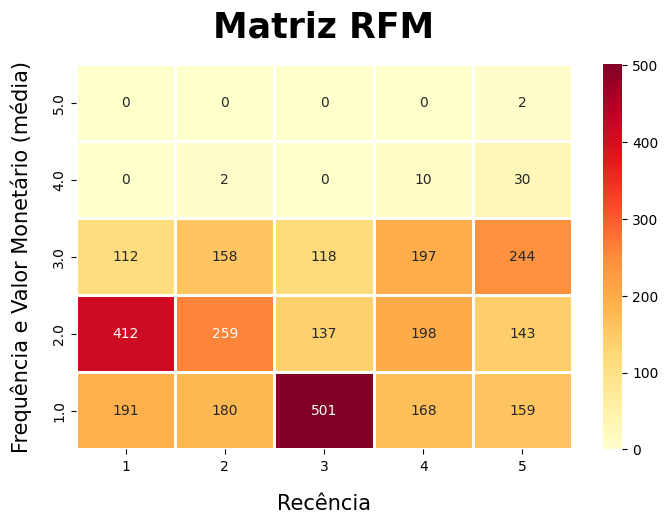

In [47]:
plt.figure(figsize=(8,5))
plot = sns.heatmap(pivot_rfm, cmap='YlOrRd', linewidth=1, linecolor='white', annot=True, fmt='.0f')
plot.set_xlabel('Recência', fontsize=15, labelpad=15)
plot.set_ylabel('Frequência e Valor Monetário (média)', fontsize=15, labelpad=15)
plot.set_title('Matriz RFM', fontsize=25, fontweight='bold', pad=20)

## 5.0 Tag - Classes

In [48]:
rfm['R'] = rfm['R'].astype('int64')
rfm['FM_media'] = rfm['FM_media'].astype('int64')

def classificar(df):
    if (df['FM_media'] == 5) and (df['R'] == 1):
        return 'Não posso perdê-lo'
    elif (df['FM_media'] == 5) and ((df['R'] == 3) or (df['R'] == 4)):
        return 'Cliente leais'
    elif (df['FM_media'] == 5) and (df['R'] == 5):
        return 'Campeão'
    elif (df['FM_media'] == 4) and (df['R'] >= 3):
        return 'Cliente leais'    
    elif (df['FM_media'] == 3) and (df['R'] == 3):
        return 'Precisam de atenção'    
    elif ((df['FM_media'] == 3) or (df['FM_media'] == 2))  and (df['R'] > 3):
        return 'Lealdade potencial' 
    elif ((df['FM_media'] == 2) or (df['FM_media'] == 1)) and (df['R'] == 1):
        return 'Clientes Perdidos'     
    elif (df['FM_media'] == 2) and (df['R'] == 2):
        return 'Hibernando'     
    elif ((df['FM_media'] == 2) or (df['R'] == 1)) and (df['R'] == 3):
        return 'Prestes a hibernar'
    elif (df['FM_media'] == 1) and (df['R'] == 2):
        return 'Clientes Perdidos'
    elif (df['FM_media'] == 1) and (df['R'] == 4):
        return 'Promissores'       
    elif (df['FM_media'] == 1) and (df['R'] == 5):
        return 'Clientes Recentes'  
    else:
        return 'Clientes em risco'

rfm['Classe'] = rfm.apply(classificar,axis=1)
rfm

,index,customer_id,Recência,Frequência,ValorMonetário,F,R,M,RFM_cluster,RFM_score,FM_media,Classe
0,0,1,255,1,196.00,1,1,3,1.01.03.0,5,2,Clientes Perdidos
1,1,2,255,1,129.00,1,1,3,1.01.03.0,5,2,Clientes Perdidos
2,2,3,50,4,537.00,2,4,5,4.02.05.0,11,3,Lealdade potencial
3,3,4,22,9,1238.30,4,5,5,5.04.05.0,14,4,Cliente leal
4,4,5,254,1,44.20,1,1,1,1.01.01.0,3,1,Clientes Perdidos
...,...,...,...,...,...,...,...,...,...,...,...,...
5945,5945,5946,2,1,127.00,1,5,2,5.01.02.0,8,1,Clientes Recentes
5946,5946,5947,2,1,144.99,1,5,3,5.01.03.0,9,2,Lealdade potencial
5947,5947,5948,1,1,127.00,1,5,2,5.01.02.0,8,1,Clientes Recentes
5948,5948,5949,1,1,297.00,1,5,5,5.01.05.0,11,3,Lealdade potencial


In [49]:
rfm = rfm.drop(columns=['RFM_cluster'], axis=1)
rfm

,index,customer_id,Recência,Frequência,ValorMonetário,F,R,M,RFM_score,FM_media,Classe
0,0,1,255,1,196.00,1,1,3,5,2,Clientes Perdidos
1,1,2,255,1,129.00,1,1,3,5,2,Clientes Perdidos
2,2,3,50,4,537.00,2,4,5,11,3,Lealdade potencial
3,3,4,22,9,1238.30,4,5,5,14,4,Cliente leal
4,4,5,254,1,44.20,1,1,1,3,1,Clientes Perdidos
...,...,...,...,...,...,...,...,...,...,...,...
5945,5945,5946,2,1,127.00,1,5,2,8,1,Clientes Recentes
5946,5946,5947,2,1,144.99,1,5,3,9,2,Lealdade potencial
5947,5947,5948,1,1,127.00,1,5,2,8,1,Clientes Recentes
5948,5948,5949,1,1,297.00,1,5,5,11,3,Lealdade potencial


In [50]:
sheets = pd.merge(rfm, customer_data, on='customer_id', how='left').reset_index()
sheets

,level_0,index,customer_id,Recência,Frequência,ValorMonetário,F,R,M,RFM_score,FM_media,Classe,customer_name,email,phone
0,0,0,1,255,1,196.00,1,1,3,5,2,Clientes Perdidos,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551
1,1,1,2,255,1,129.00,1,1,3,5,2,Clientes Perdidos,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088
2,2,2,3,50,4,537.00,2,4,5,11,3,Lealdade potencial,AGUINALDO VESTRI PEDROSO,avpedroso@uol.com.br,(19)99637-6686
3,3,3,4,22,9,1238.30,4,5,5,14,4,Cliente leal,Laura Ribeiro,laurarc@live.com,(62)99808-1188
4,4,4,5,254,1,44.20,1,1,1,3,1,Clientes Perdidos,Henrique Aguiar Lima,henrique_6_0@hotmail.com,(66)99968-8186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,5945,5945,5946,2,1,127.00,1,5,2,8,1,Clientes Recentes,Celer Coelho Da Costa,celercoelho@hotmail.com,(41)99628-3000
5946,5946,5946,5947,2,1,144.99,1,5,3,9,2,Lealdade potencial,Alexandre Magno Scherer Borborema,alescherer@yahoo.com,(41)99194-4628
5947,5947,5947,5948,1,1,127.00,1,5,2,8,1,Clientes Recentes,Alisson Santos Da Silva,adalisson360@gmail.com,(71)99116-4516
5948,5948,5948,5949,1,1,297.00,1,5,5,11,3,Lealdade potencial,JAIME DE CARVALHO LEITE FILHO,jaimeclf@gmail.com,(61)98114-9710


In [51]:
sheets = sheets.drop(['level_0', 'index', 'F', 'M', 'R', 'RFM_score', 'FM_media'], axis=1)
sheets

,customer_id,Recência,Frequência,ValorMonetário,Classe,customer_name,email,phone
0,1,255,1,196.00,Clientes Perdidos,Marcel Trigueiro Guerra De Sousa,marcel.trigueiro@gmail.com,(21)98018-5551
1,2,255,1,129.00,Clientes Perdidos,Eduardo Campagnolo,eduardocampagnolo@hotmail.com,(54)99112-5088
2,3,50,4,537.00,Lealdade potencial,AGUINALDO VESTRI PEDROSO,avpedroso@uol.com.br,(19)99637-6686
3,4,22,9,1238.30,Cliente leal,Laura Ribeiro,laurarc@live.com,(62)99808-1188
4,5,254,1,44.20,Clientes Perdidos,Henrique Aguiar Lima,henrique_6_0@hotmail.com,(66)99968-8186
...,...,...,...,...,...,...,...,...
5945,5946,2,1,127.00,Clientes Recentes,Celer Coelho Da Costa,celercoelho@hotmail.com,(41)99628-3000
5946,5947,2,1,144.99,Lealdade potencial,Alexandre Magno Scherer Borborema,alescherer@yahoo.com,(41)99194-4628
5947,5948,1,1,127.00,Clientes Recentes,Alisson Santos Da Silva,adalisson360@gmail.com,(71)99116-4516
5948,5949,1,1,297.00,Lealdade potencial,JAIME DE CARVALHO LEITE FILHO,jaimeclf@gmail.com,(61)98114-9710


In [55]:
# exportar planilha

# planilha = 'kawa_rfm_3.csv'
# sheets.to_csv(planilha, index=False)

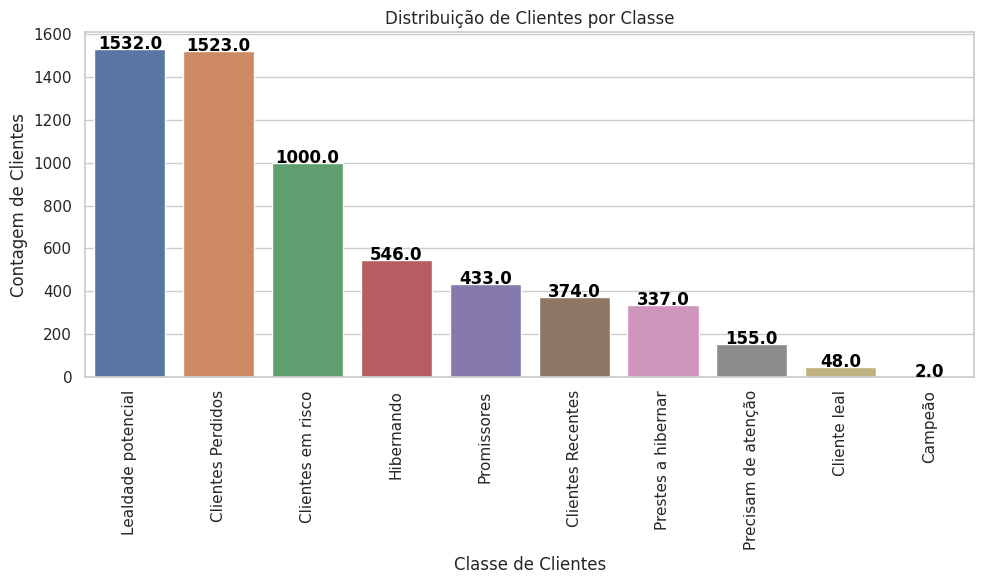

In [53]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.countplot(data=rfm, x='Classe', order=rfm['Classe'].value_counts().index)
plt.xlabel('Classe de Clientes')
plt.ylabel('Contagem de Clientes')
plt.title('Distribuição de Clientes por Classe')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', weight='bold')
    
plt.tight_layout()
plt.show()